<a href="https://colab.research.google.com/github/robitussin/CCDEPLRL_EXERCISES/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

Import the libraries

In [ ]:
%pip install keras
%pip install tensorflow

In [42]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [27]:
import keras
import matplotlib.pyplot as plt


Hyperparameters: Set the image size and batch size

In [28]:
image_width = 32
image_height = 32
s = 32

batch_size = 32

Split the images into train, validation and test

In [29]:
train = keras.utils.image_dataset_from_directory(
    "./fruits/train",
    image_size = s,
    batch_size = batch_size,
    shuffle = True
)

test = keras.utils.image_dataset_from_directory(
    "./fruits/test",
    image_size = s,
    batch_size = batch_size,
    shuffle = True
)

validation = keras.utils.image_dataset_from_directory(
    "./fruits/validation",
    image_size = s,
    batch_size = batch_size,
    shuffle = True
)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


Display sample images from the dataset

In [30]:
class_names = ["apple", "banana", "orange"]

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


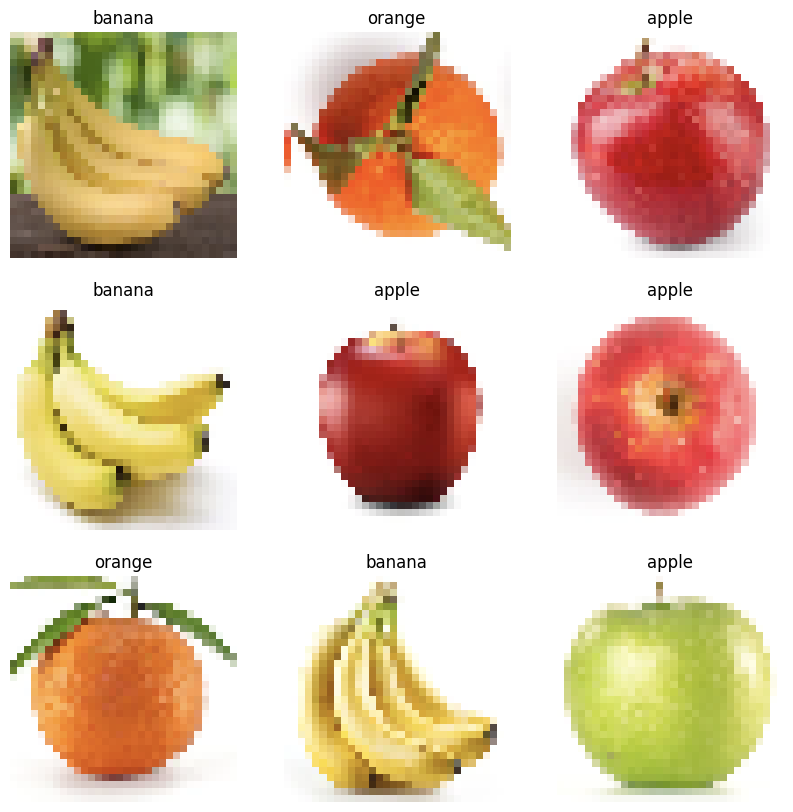

In [31]:

for images, labels in train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(images[i].shape)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [32]:
model = keras.Sequential([
    # makes each pixel to decimals (e.g 248 * (1./255) -> 0.97) (normalization)
    keras.layers.Rescaling(1./255, input_shape=(s, s, 3)),
    
    # CONV STAGE 1 (add more stage for more accuracy: filter 32 -> 64 -> 128)
        # apply relu (0 or x) to each (3 by 3) pixel 
        keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
        
        # and reduce the size of an image
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    
    # CONV STAGE 2 (optional)
        keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    
    # CONV STAGE 3 (optional)
        keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        
    # flatten first to turn into a feature (or columns or neurons)
    # e.g (6 * 6 * 64) = 2304 columns
    keras.layers.Flatten(),
    
    # turns the 2304 to 128 neurons (dimensionality reduction)
    keras.layers.Dense(128, activation='relu'),
    
    # it predicts either of the 3 (banana, apple, orange)
    keras.layers.Dense(len(class_names))
])

model.summary()

/home/ubuntu-rainn/miniconda3/envs/com222/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,299 (622.26 KB)

 Trainable params: 159,299 (622.26 KB)

 Non-trainable params: 0 (0.00 B)

Define the optimizer and loss function

In [33]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)



Train the model

In [34]:
model.fit(
    train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5204 - loss: 1.0047 - val_accuracy: 0.7879 - val_loss: 0.5640
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7394 - loss: 0.5885 - val_accuracy: 0.7879 - val_loss: 0.4681
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8511 - loss: 0.3936 - val_accuracy: 0.8636 - val_loss: 0.3086
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9222 - loss: 0.2428 - val_accuracy: 0.8636 - val_loss: 0.3682
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9442 - loss: 0.1586 - val_accuracy: 0.9242 - val_loss: 0.3478
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9525 - loss: 0.1640 - val_accuracy: 0.9242 - val_loss: 0.1752
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9526 - loss: 0.1292 - val_accuracy: 0.9242 - val_loss: 0.2661
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9481 - loss: 0.1671 - val_accuracy: 0.9848 - v

Test the model

In [35]:
model.evaluate(test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9802 - loss: 0.1084 


[0.12903475761413574, 0.9692307710647583]

Save the model

In [ ]:
model.save('model.h5')

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open("model.tflite", 'wb') as f:
#   f.write(tflite_model)

# 200 FRUITS DATASET

In [37]:

fruits_ds = keras.utils.image_dataset_from_directory(
    './testing',
    batch_size=200,
    image_size=(32,32),
)


Found 331 files belonging to 2 classes.


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


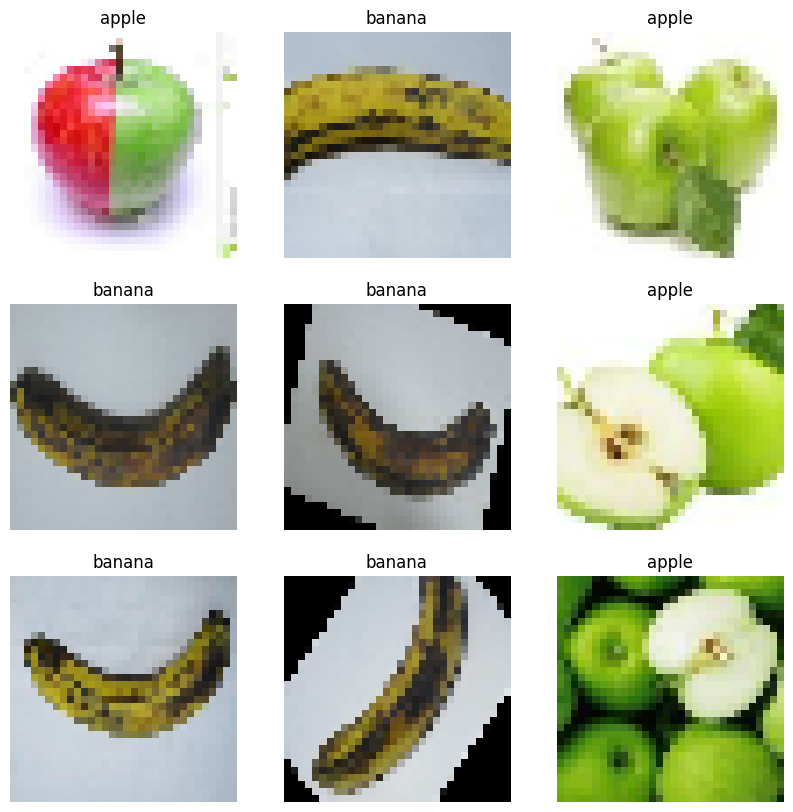

In [40]:
for images, labels in fruits_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(images[i].shape)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")

In [38]:
loaded_model = keras.models.load_model('./model.h5')

loaded_model.evaluate(fruits_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6051 - loss: 1.8247 


[1.8695433139801025, 0.5951661467552185]

2025-05-17 20:58:22.776809: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


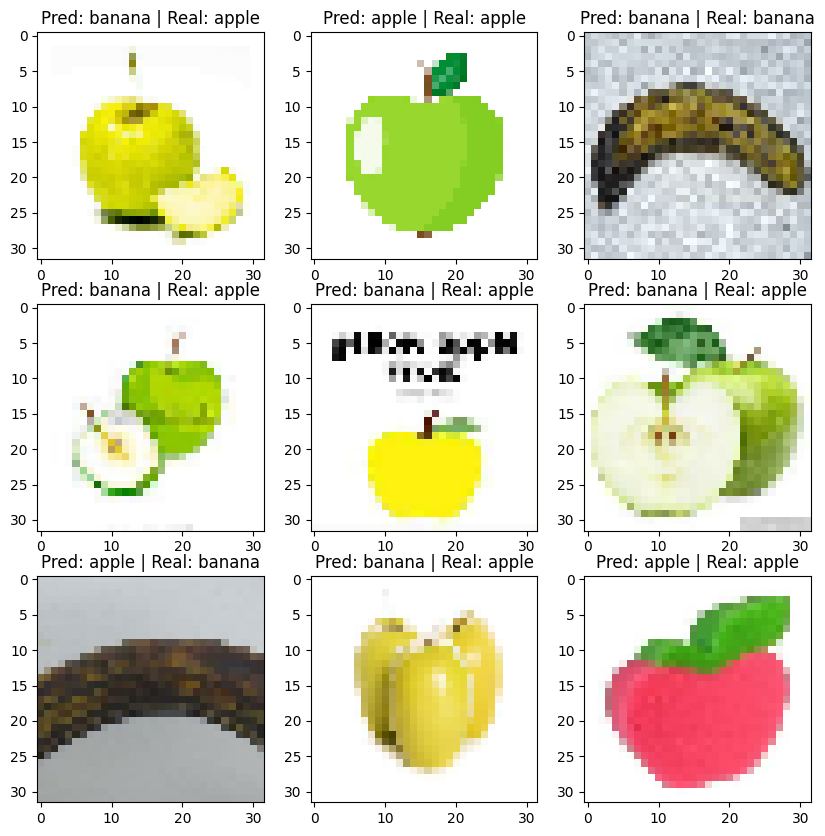

In [39]:
import numpy
plt.figure(figsize=(10,10))
for images, labels in fruits_ds.take(1):
  classifications = loaded_model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])